# Using Python to get financial data
### MSDS 430 - Python for data Science - Final Project
###### Carrie Lu & Ryan Zimmerman


For the final project we're going to work with financial data.  We're planning to use the Pandas data reader and iex API as no importing of CSV datasets is necessary and this can give more real time data if needed. 

In [ ]:
#get the appropriate libraries and import the data
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#create object variables start and end
start = date.today()-timedelta(720)
end = date.today()


#set up for stock ticker
ticker = 'GOOG'

#get data from iex
data_source = 'iex'


#create data reader object
stock_data = DataReader(ticker,data_source,start,end)



In [ ]:
#table of stock data for google
stock_data.head()

Our professor also wanted us to read in .CSV data so he could see us demonstrate this.  The goal here is to show that we can read in CSV information. We did choose however to use Pandas for our project.  The next step will demonstrate while we got the data from Kaggle.com it it was difficult to find up to date CSV information on stocks.  While with enough research we probably could have, the effort to manually maintain CSV data meant that using Pandas data reader was the preferred method for importing financial information.

In [ ]:
#used pandas to do this so we could easily create columns
import pandas as pd

#read in the file and created columns
data = pd.read_csv('prices.csv', sep=",")
data.columns = ['date','symbol','open','close','low','high','volume']

#show just google data
data_goog_index = data['symbol'].str.contains('GOOG')
print(data[data_goog_index].head(5))

#show just google data and sort by date
df = pd.DataFrame(data)
df_filtered = df[(df.symbol == 'GOOG')&(df.date>'2015-01-01')].sort_values(by =['date'],ascending=False)
df_filtered.head()




In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot all variables
stock_data.plot()
plt.show()

#refining to show google at close over time as volume dominates the first chart
stock_data['close'].plot(title=ticker)

Typically averages are used often to determine a markets major trend, we're going to import the dow jones industrial average and then calculate the average to show how it's changed in the last two years

In [ ]:
import numpy as np
import pandas as pd

#read in dow jones data from Fred
data = DataReader('DJIA', 'fred', start, end)

#dow jones over time
data.plot()
plt.show()

#adding in an average line
data.insert(1,'AVG',(np.sum(data.DJIA)/data.DJIA.count()))


#dow jones over time
data.plot()
plt.show()


Let's create a function that allows a user to input data and return a plot for a certain stock over a certain time period

In [ ]:
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#creating a function to pull data for a user input stock
while True:
    try:
         ticker = str(input("Please enter a stock symbol: "))
         start = str(input("Please enter a start date in YYYY-MM-DD format: "))
         end = str(input("Please enter an end date in YYYY-MM-DD format: "))
         data_source = 'iex'
         stock_data = DataReader(ticker,data_source,start,end)
         stock_data['close'].plot(title=ticker)
         break  
        
    except ValueError:
         print("Please enter a valid stock symbol and a date in YYYY-MM-DD format, e.g.: 2018-11-23")


#creating a user defined function to do the same thing
def stock_chart(ticker,data_source = 'iex', start,end):
         stock_data = DataReader(ticker,data_source,start,end)
         return stock_data['close'].plot(title=ticker) 

stock_chart(ticker ='GOOG', start = '2018-01-01', end ='2018-11-01')

            

In [ ]:
#comparing 2 stocks at a time
stock_data1 = DataReader('GOOG','iex','2018-01-01','2018-11-10')
stock_data2 = DataReader('NKE','iex','2018-01-01','2018-11-10')

plt.plot( 'volume',data=stock_data1, markersize=1, color='skyblue', linewidth=4)
plt.plot( 'volume',data=stock_data2, markersize=1, color='red', linewidth=4)



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_datareader import data, DataReader
def compare_various_stock_info(stock_list, data_source='iex',start='2018-01-01',end='2018-11-10',
                               compare_type='volume',convert_to_percentage=True):
    #comparing 2 stocks at a time
    for stock in stock_list:
        stock_data = DataReader(stock,data_source,start,end)
        if convert_to_percentage is True:
            stock_data[compare_type] = stock_data[compare_type].divide(stock_data[compare_type][0])
        plt.plot(compare_type,data=stock_data, markersize=1,  linewidth=4)
    plt.xlabel("Date") 
    if convert_to_percentage:
        plt.ylabel("comparing {} for {}, converted to percentage".format(compare_type, stock_list)) 
    else:
        plt.ylabel("comparing {} for {}".format(compare_type, stock_list)) 
    # TODO: set date format https://matplotlib.org/examples/api/date_demo.html

In [3]:
#creating a function to pull data for a user input stock
def run():
    tickers = str(input("Please enter stock symbols (seperated by ,): "))
    ticker_list = tickers.split(",")
    start = str(input("Please enter a start date in YYYY-MM-DD format: "))
    end = str(input("Please enter an end date in YYYY-MM-DD format: "))
    compare_type = str(input("enter content to compare (close, volume etc.):"))
    convert_to_percentage = int(input("enter conver to percentage or not (0 for false, 1 for true):"))
    convert_to_percentage = bool(convert_to_percentage)
    compare_various_stock_info(stock_list = ticker_list, start=start, end=end, compare_type=compare_type, convert_to_percentage=convert_to_percentage)

Please enter stock symbols (seperated by ,): GOOG,FB,MSFT
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-12-31
enter content to compare (close, volume etc.):volume
enter conver to percentage or not (0 for false, 1 for true)1


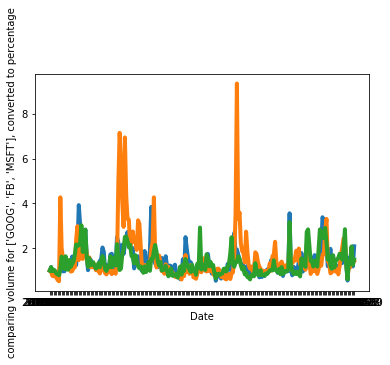

In [4]:
# compare_various_stock_info(['GOOG','FB'])
run()

Please enter stock symbols (seperated by ,): GOOG,FB,MSFT
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-12-01
enter content to compare (close, volume etc.):close
enter conver to percentage or not (0 for false, 1 for true)0


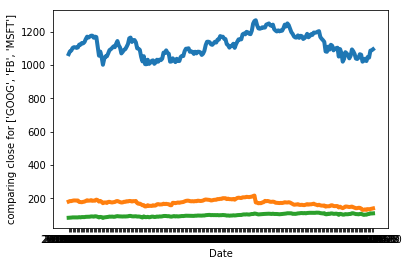

In [5]:
run()